In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
from neko._methods.methods_update import Connections
import omnipath as op
import pandas as pd

CPU times: user 3.82 s, sys: 1.51 s, total: 5.33 s
Wall time: 4.41 s


In [2]:
interactions = op.interactions.OmniPath.get()

In [3]:
initial_nodes = [
"PIK3CA",
"MAP2K1",
"GSK3B",
"MAPK14",
"CTNNB1",
"AKT1",
"MAP3K7"]

In [ ]:
initial_nodes_2 = ["PDIA3","CALR","BAX","BAD","BCAP31","CANX","EIF2AK3","ATF6","IRE1"]

In [31]:
new_net = Network(initial_nodes=initial_nodes, resources=interactions)

In [32]:
new_net2 = Network(initial_nodes=initial_nodes, resources=interactions)

In [33]:
new_net3 = Network(initial_nodes=initial_nodes, resources=interactions)

In [34]:
new_net4 = Network(initial_nodes=initial_nodes, resources=interactions)

# Original complete connection

In [29]:
%%time
new_net.complete_connection(maxlen=6, consensus=True, only_signed=True, connect_node_when_first_introduced=False)

CPU times: user 12.7 s, sys: 0 ns, total: 12.7 s
Wall time: 12.7 s


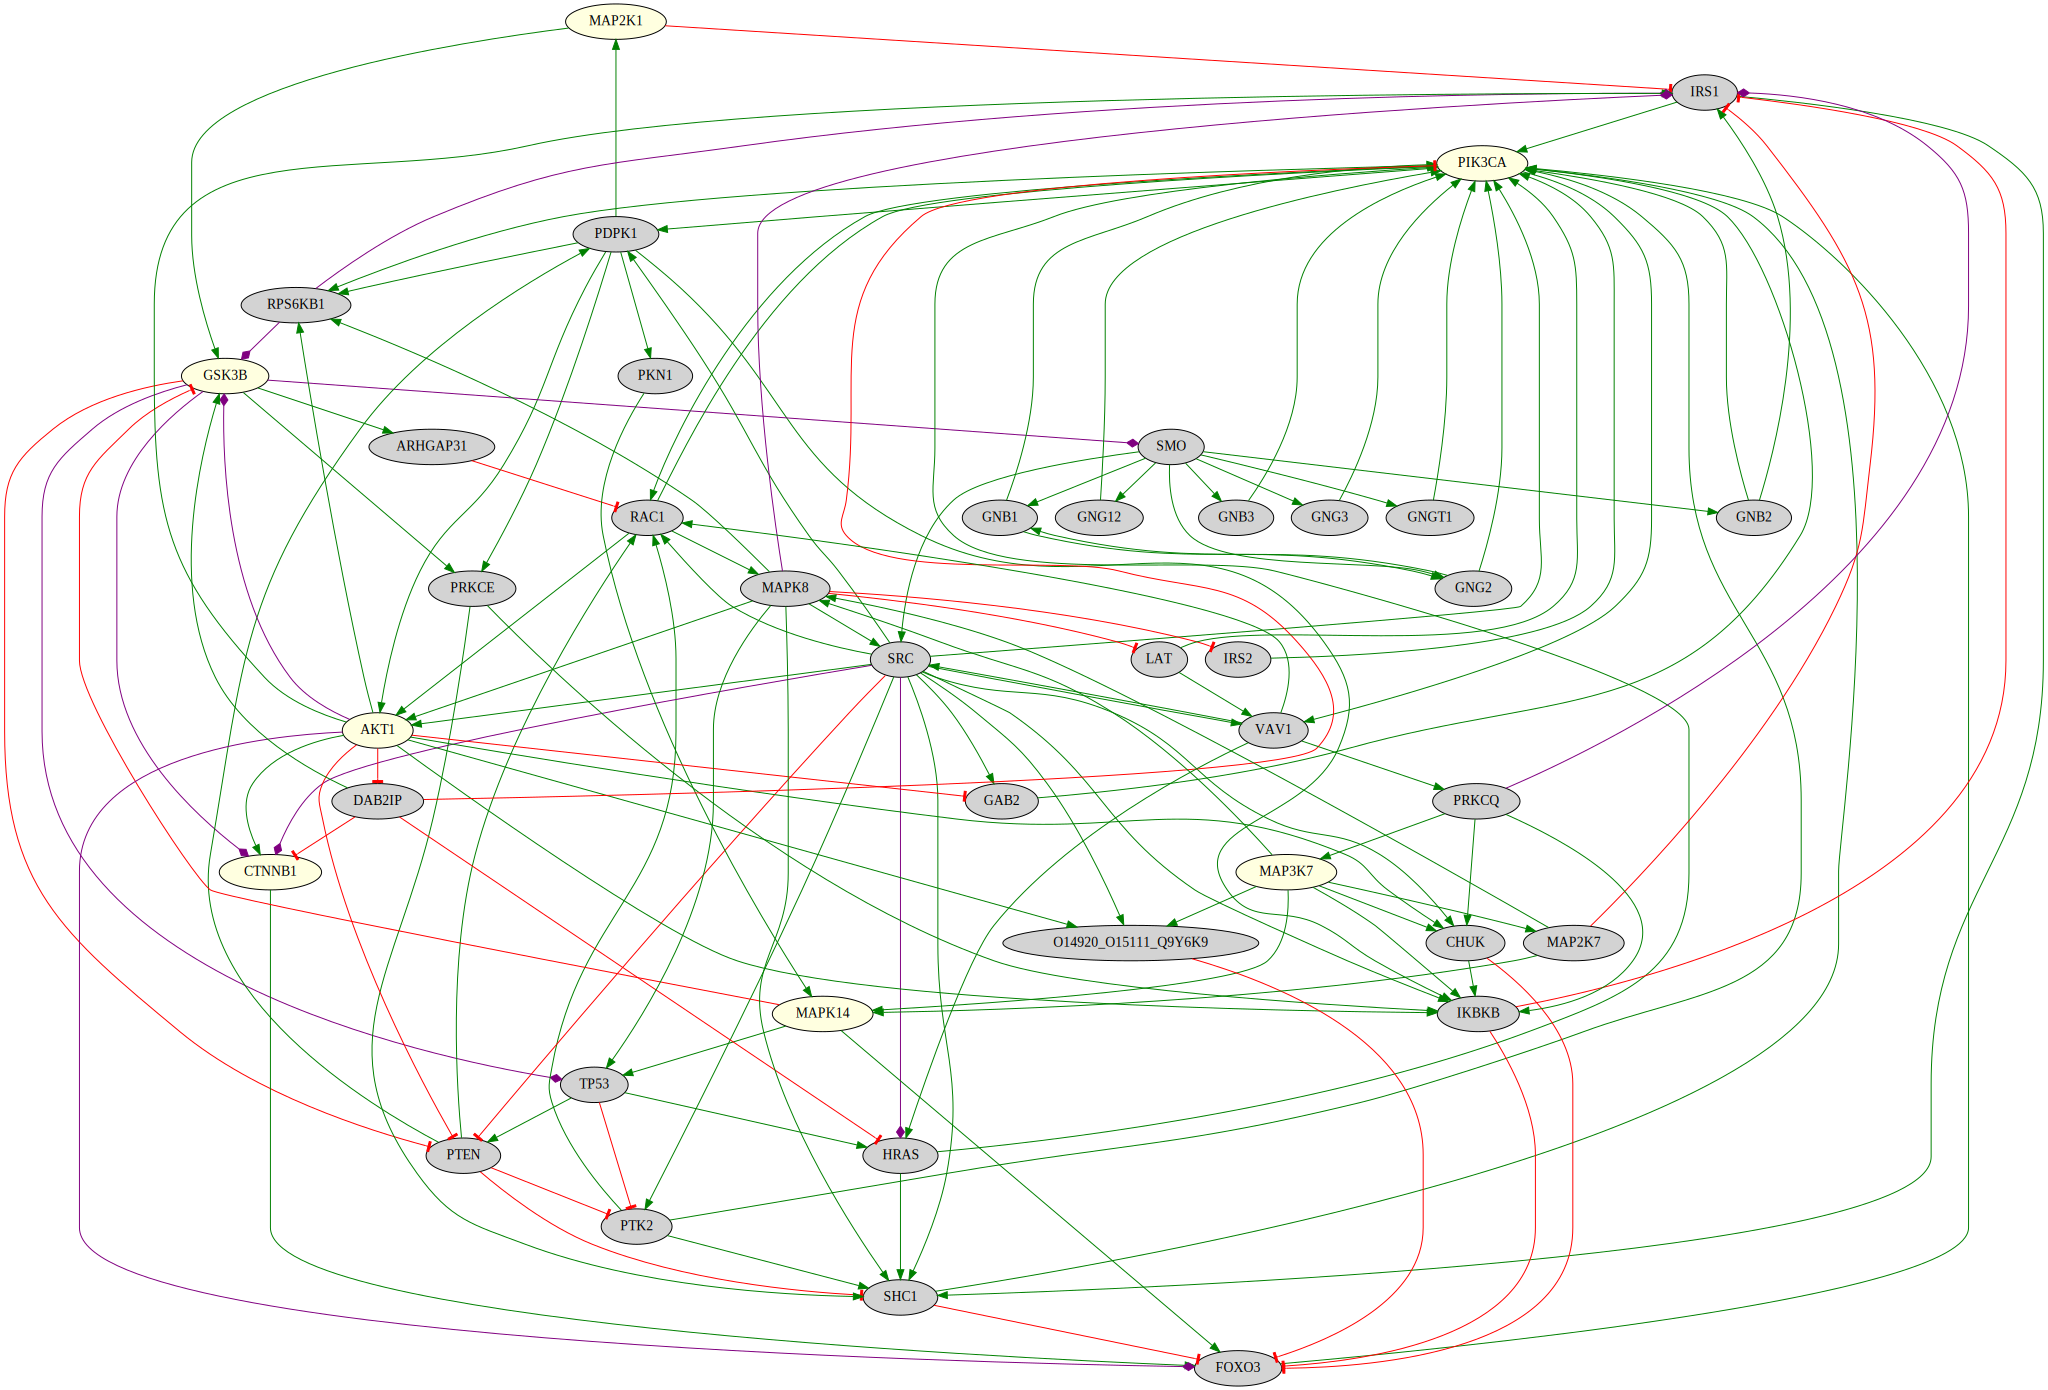

In [30]:
visualizer = NetworkVisualizer(new_net, color_by='effect', noi=True)
visualizer.render(output_file="Net1")

# V2 complete connection: shortest_path & all_shortes_paths

In [11]:
%%time
new_net2.complete_connectionv2(maxlen=6, consensus=True, only_signed=True, connect_node_when_first_introduced=False)

CPU times: user 5.22 s, sys: 1.81 ms, total: 5.22 s
Wall time: 5.26 s


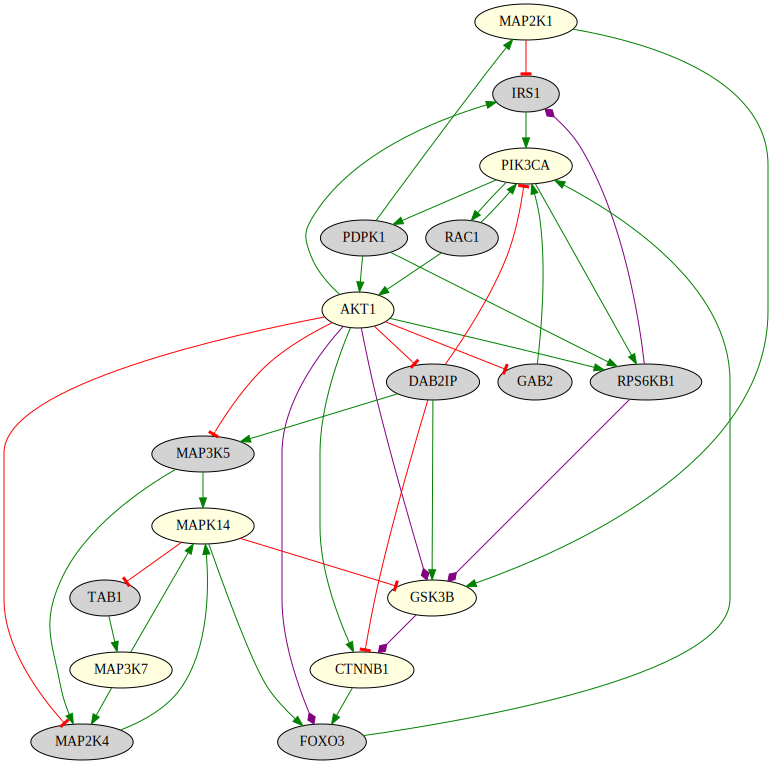

In [12]:
visualizer2 = NetworkVisualizer(new_net2, color_by='effect', noi=True)
visualizer2.render(output_file="Net2")

# V3 complete connection: bfs & find_paths

In [26]:
%%time
new_net3.complete_connectionv3(maxlen=3, consensus=True, only_signed=True, connect_node_when_first_introduced=False)

CPU times: user 13.5 s, sys: 4.91 ms, total: 13.5 s
Wall time: 13.5 s


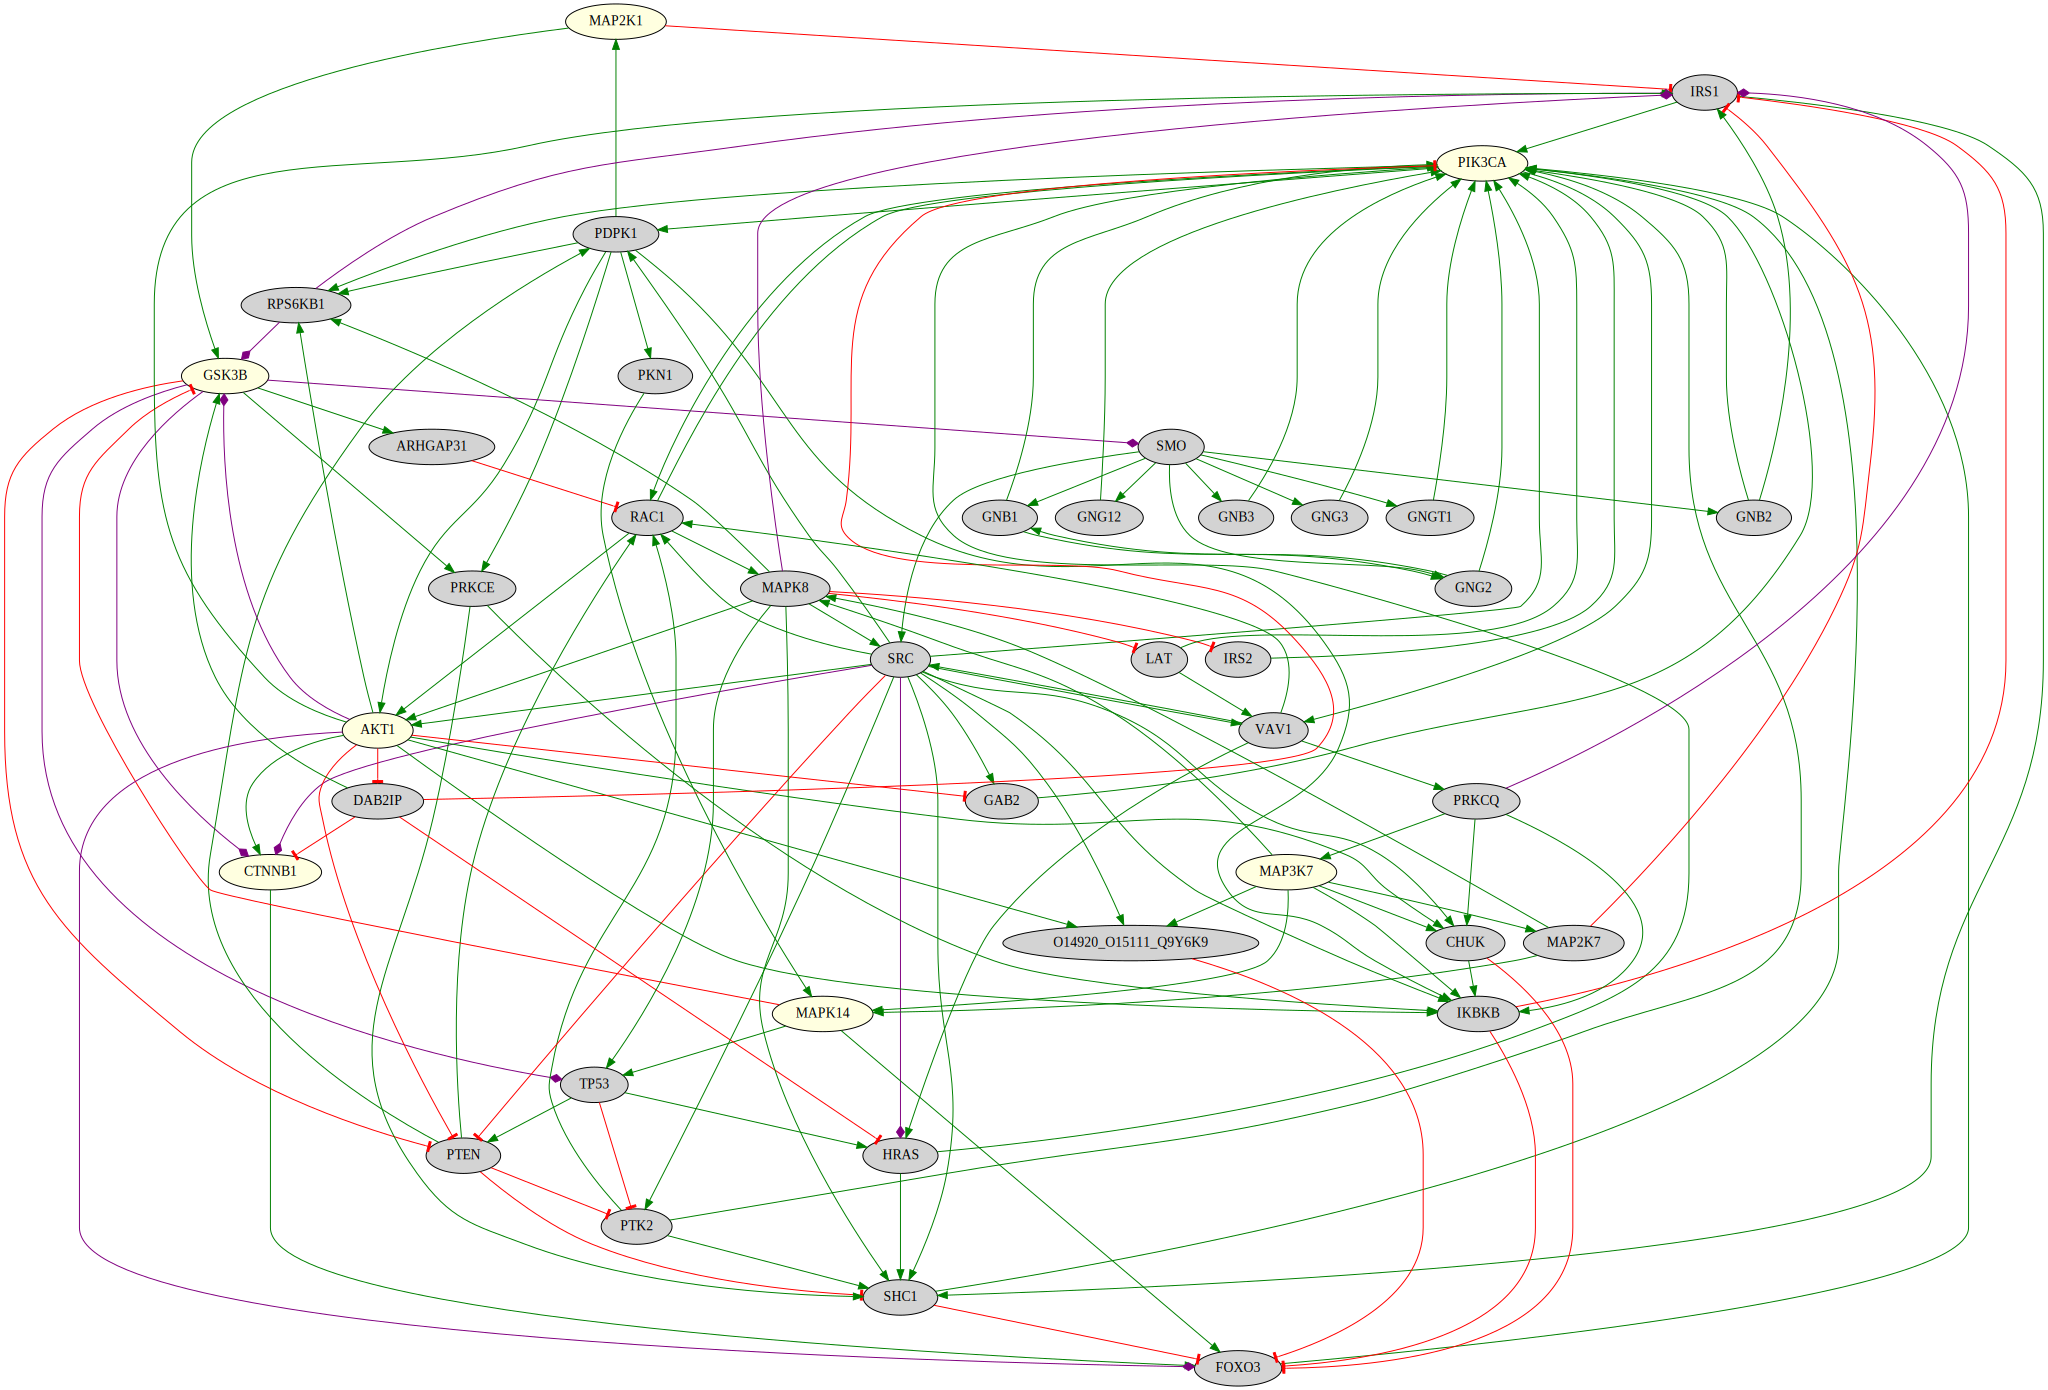

In [27]:
visualizer3 = NetworkVisualizer(new_net3, color_by='effect', noi=True)
visualizer3.render(output_file="Net3")

# V4 complete connection: bfs & all_shortes_paths

In [15]:
%%time
new_net4.complete_connectionv4(maxlen=3, consensus=True, only_signed=True, connect_node_when_first_introduced=False)

CPU times: user 5.03 s, sys: 44 µs, total: 5.03 s
Wall time: 5.03 s


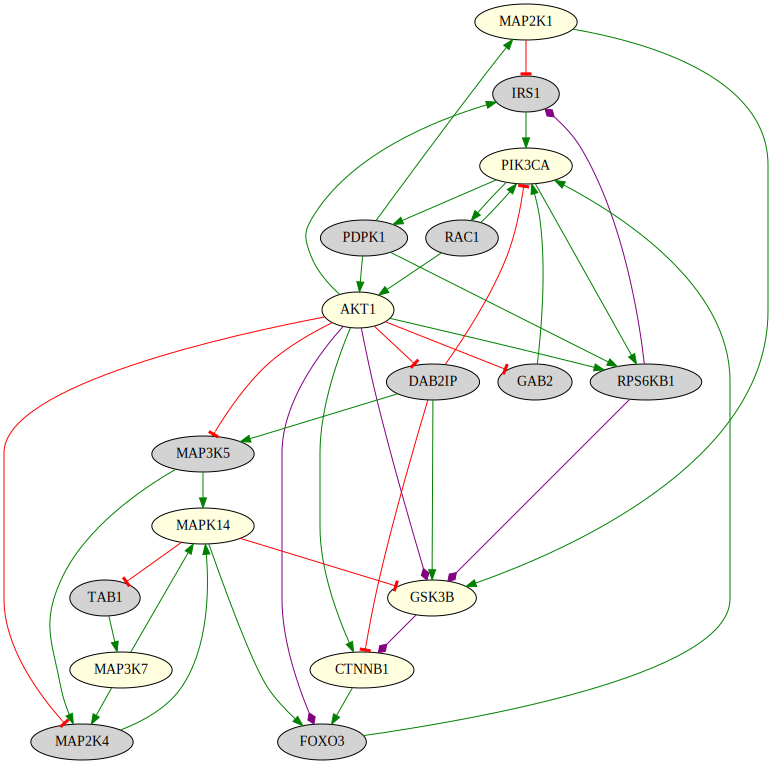

In [16]:
visualizer4 = NetworkVisualizer(new_net4, color_by='effect', noi=True)
visualizer4.render(output_file="Net4")

In [35]:
new_net.nodes

,Genesymbol,Uniprot,Type
0,PIK3CA,P42336,NaN
1,MAP2K1,Q02750,NaN
2,GSK3B,P49841,NaN
3,MAPK14,Q16539,NaN
4,CTNNB1,P35222,NaN
5,AKT1,P31749,NaN
6,MAP3K7,O43318,NaN


In [47]:
%%time
new_net.connect.find_shortest_path("Q02750", "O43318", max_len=4)

CPU times: user 85.3 ms, sys: 0 ns, total: 85.3 ms
Wall time: 84.9 ms


['Q02750', 'P28482', 'P49116', 'O43318']

In [48]:
%%time
new_net.connect.find_all_shortest_paths("Q02750", "O43318", max_len=4)

CPU times: user 86.8 ms, sys: 1.99 ms, total: 88.8 ms
Wall time: 88.3 ms


[['Q02750', 'P28482', 'P49116', 'O43318'],
 ['Q02750', 'P28482', 'P67775', 'O43318'],
 ['Q02750', 'P49841', 'O95819', 'O43318'],
 ['Q02750', 'P49841', 'Q13555', 'O43318'],
 ['Q02750', 'P49841', 'Q9Y4K3', 'O43318']]

In [37]:
%%time
new_net.connect.bfs("Q02750", "O43318")

CPU times: user 6.17 ms, sys: 2 µs, total: 6.17 ms
Wall time: 6.16 ms


['Q02750', 'P28482', 'P67775', 'O43318']

In [40]:
%%time
found = False
i=0
while not found:
    a = new_net.connect.find_paths("Q02750", "O43318", maxlen=i)
    if a:
        found=True
    else:
        i = i+1

CPU times: user 7.94 ms, sys: 0 ns, total: 7.94 ms
Wall time: 7.77 ms


In [41]:
a

[['Q02750', 'P28482', 'P49116', 'O43318'],
 ['Q02750', 'P28482', 'P67775', 'O43318'],
 ['Q02750', 'P49841', 'O95819', 'O43318'],
 ['Q02750', 'P49841', 'Q13555', 'O43318'],
 ['Q02750', 'P49841', 'Q9Y4K3', 'O43318']]